    1. Read the dataset to the python environment.
    2. Do necessary pre-processing steps.
    3. Find out which classification model gives the best result to predict iris
    species.(also do random forest algorithm)

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
df=pd.read_excel('iris.xls')
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [146]:
#Checking for null values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [147]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


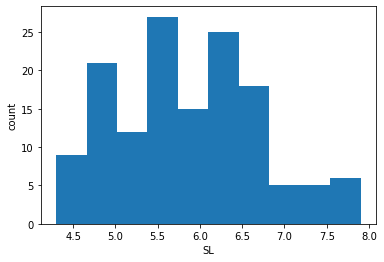

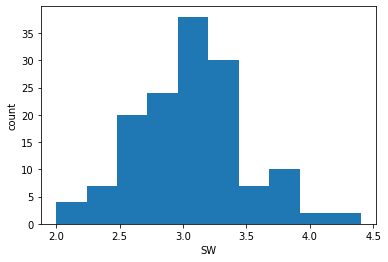

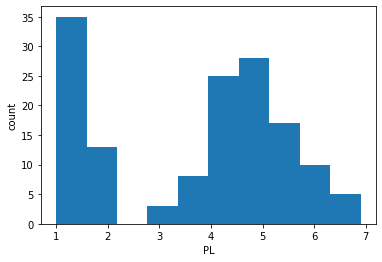

In [148]:
for i in df.columns[0:3]:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

    Since all these three columns are not normal, we fill the missing values with mode

In [149]:
for i in df.columns[0:3]:
    df[i]=df[i].fillna(df[i].mode()[0])
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [150]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.816000,3.047333,3.666000,1.198667
std,0.828525,0.421995,1.781592,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [152]:
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [153]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Classification']=le.fit_transform(df['Classification'])
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,1.5,2.0,2
148,6.2,3.4,5.4,2.3,2


In [154]:
#Separating X and y
X=df.drop(['Classification'], axis=1)
y=df['Classification']

In [155]:
#Splitting the dataset into train data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)
X_train.shape

(112, 4)

# Training, predicting and comparing

In [156]:
#Creating a function for training and predicting the data.

from sklearn.metrics import f1_score
from time import time

table={'Training Time':[],'Prediction Time(Test)':[],'F1 Score(train)':[],'F1 Score(test)':[]}
comp_tab=pd.DataFrame(table)

def train_predict(clf, X_train, X_test, y_train, y_test):
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    train_time=round(end-start,4)
 
    
    y_pred = clf.predict(X_train)
    f1_train=f1_score(y_train.values, y_pred, average='micro', )
    
 
    start = time()
    y_pred = clf.predict(X_test)
    end = time()
    f1_test=f1_score(y_test.values, y_pred, average='micro')
    pred_time_test=round(end-start,4)
    
    return train_time,  pred_time_test, f1_train, f1_test


We are using these 6 common algorithms.
1. Logistic Regression
2. Support Vector Machine (SVM)
3. K – Nearest Neighbour (KNN)
4. Decision Trees
5. Random Forest
6. Gradient Boosting

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
LR = LogisticRegression()
SVM = SVC()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()
for clf in [LR, SVM, KNN, DT, RF, GB]:
    tt,pt_test,f1_train,f1_test=train_predict(clf, X_train, X_test, y_train, y_test)
    comp_tab.loc[len(comp_tab.index)] = [tt, pt_test, f1_train, f1_test]
    
comp_tab.insert(0, 'Algorithm', ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB']) 
comp_tab

,Algorithm,Training Time,Prediction Time(Test),F1 Score(train),F1 Score(test)
0,LR,0.0777,0.0000,0.919643,0.973684
1,SVM,0.0000,0.0000,0.946429,0.973684
2,KNN,0.0000,0.0000,0.946429,0.947368
3,DT,0.0000,0.0000,1.000000,1.000000
4,RF,0.2500,0.0156,1.000000,1.000000
5,GB,0.3750,0.0000,1.000000,1.000000


    Inference
    Decition Tree is the best agorithm for this classification prediction. 
    Because, both time and accuracy are perfect for Decition tree here.